In [9]:
import os
import sys
from pathlib import  Path

import zipfile
import requests

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import  train_test_split

import tensorflow
import tensorflow as tf
from tensorflow.keras import  layers, callbacks
from tensorflow.keras.layers import Normalization, Dense, InputLayer, Dropout, BatchNormalization
from tensorflow.keras.losses import MeanSquaredError,Huber,MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adagrad, RMSprop, Adam

In [2]:
from PIL import Image
image = Image.open('cat.jpg')

# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)

JPEG
(1600, 1067)
RGB


In [3]:
# PIL images into NumPy arrays
numpydata = np.asarray(image)

# <class 'numpy.ndarray'>
print(type(numpydata))

#  shape
print(numpydata.shape)

<class 'numpy.ndarray'>
(1067, 1600, 3)


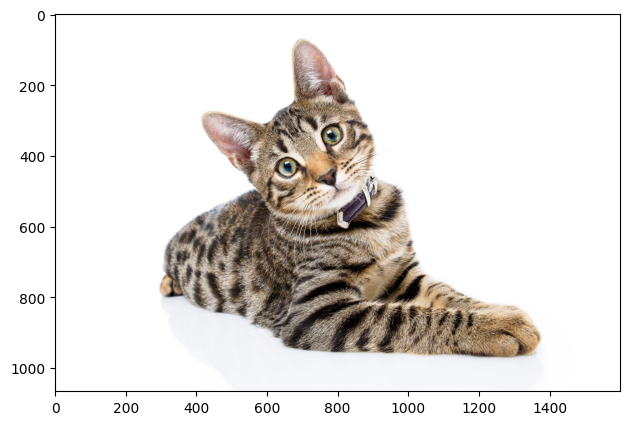

In [4]:
plt.imshow(numpydata)
plt.tight_layout()
plt.show()

(1067, 1600, 3)
(200, 200, 3)


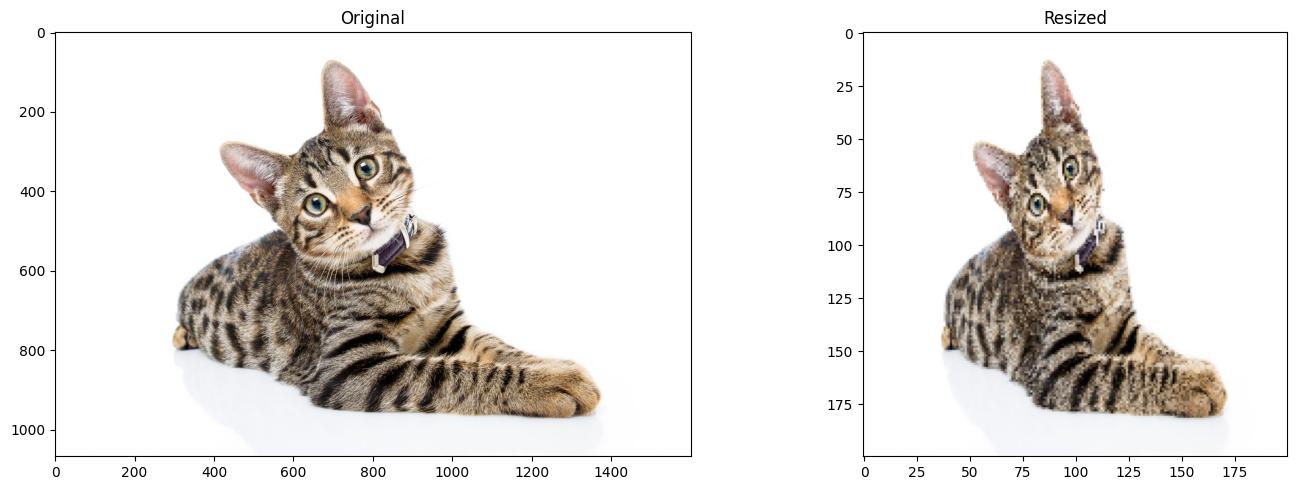

In [8]:
import cv2
import numpy as np

imgg = cv2.imread('cat.jpg')

npdata= np.asarray(imgg)

res = cv2.resize(numpydata, dsize=(200, 200), interpolation=cv2.INTER_LINEAR)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
print(numpydata.shape)
print(res.shape)
ax[0].imshow(numpydata)
ax[0].set_title("Original")
ax[1].imshow(res)
ax[1].set_title("Resized")
plt.tight_layout()
plt.show()

In [16]:

from keras.preprocessing.image import load_img
import warnings

# load the image via load_img
# function
img = load_img('cat.jpg')

# details about the image printed below
print(type(img))
print(img.format)
print(img.mode)
print(img.size)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(1600, 1067)


In [17]:
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

# details about the image printed below
print(type(img))
print(img.format)
print(img.mode)
print(img.size)

# convert the given image into  numpy array
img_numpy_array = img_to_array(img)
print("Image is converted and NumPy array information :")

# <class 'numpy.ndarray'>
print(type(img_numpy_array))

# type: float32
print("type:", img_numpy_array.dtype)

# shape: (200, 400, 3)
print("shape:", img_numpy_array.shape)

# convert back to image
img_pil_from_numpy_array = array_to_img(img_numpy_array)

# <class 'PIL.PngImagePlugin.PngImageFile'>
print("converting NumPy array into image:",
      type(img_pil_from_numpy_array))

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(1600, 1067)
Image is converted and NumPy array information :
<class 'numpy.ndarray'>
type: float32
shape: (1067, 1600, 3)
converting NumPy array into image: <class 'PIL.Image.Image'>


(1067, 1600, 3)
(200, 200, 3)


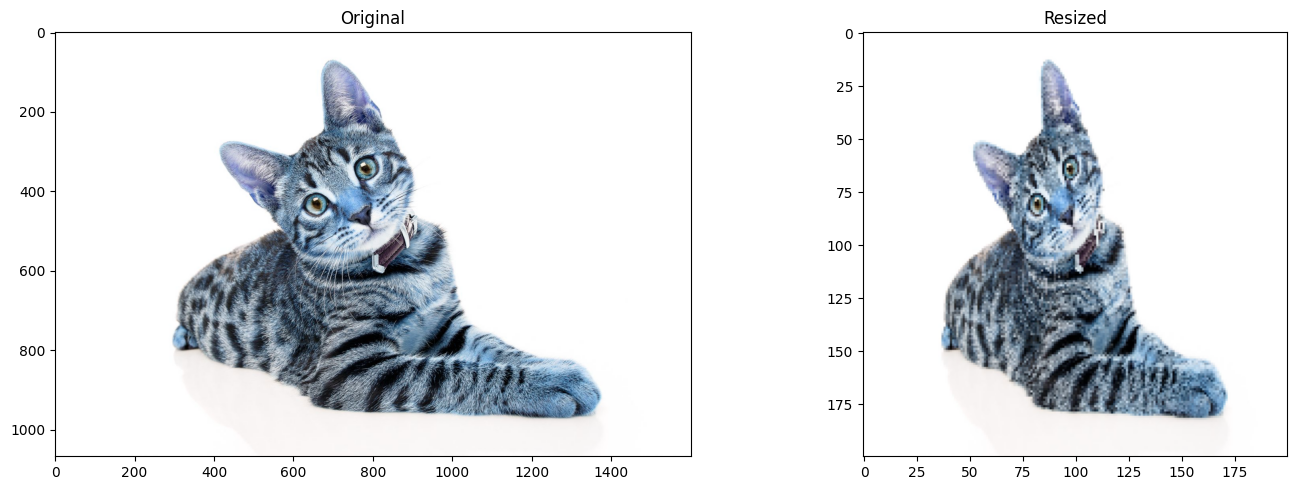

In [44]:
import cv2
import numpy as np

img = cv2.imread('cat.jpg')
res = cv2.resize(img, dsize=(200,200), interpolation=cv2.INTER_LINEAR)

fig, ax = plt.subplots(1,2,figsize=(15,5))
print(img.shape)
print(res.shape)
ax[0].imshow(img)
ax[0].set_title("Original")
ax[1].imshow(res)
ax[1].set_title("Resized")
plt.tight_layout()
plt.show()

In [2]:
import tensorflow as tf

# Example data
y_true_binary = tf.constant([0, 1, 1, 0], dtype=tf.float32)
y_pred_binary = tf.constant([0.2, 0.8, 0.6, 0.3], dtype=tf.float32)

# Binary Crossentropy
binary_crossentropy = tf.keras.losses.BinaryCrossentropy()
loss_binary = binary_crossentropy(y_true_binary, y_pred_binary)

print(f'Binary Crossentropy Loss: {loss_binary.numpy()}')

Binary Crossentropy Loss: 0.32844674587249756


In [10]:
# Example data
y_true_categorical = tf.constant(
    [[0, 1, 0], [1, 0, 0], [0, 0, 1]], dtype=tf.float32)
y_pred_categorical = tf.constant(
    [[0.1, 0.7, 0.2], [0.8, 0.1, 0.1], [0.3, 0.4, 0.3]], dtype=tf.float32)

# Categorical Crossentropy
categorical_crossentropy = tf.keras.metrics.CategoricalCrossentropy()
loss_categorical = categorical_crossentropy(
    y_true_categorical, y_pred_categorical)

print(f'Categorical Crossentropy Loss: {loss_categorical.numpy()}')


Categorical Crossentropy Loss: 0.5945971012115479


In [12]:
# Example data (integer labels)
y_true_sparse = tf.constant([1, 0, 2], dtype=tf.int64)
y_pred_sparse = tf.constant([[0.1, 0.7, 0.2], [0.8, 0.1, 0.1], [
                            0.3, 0.4, 0.3]], dtype=tf.float32)

# Sparse Categorical Crossentropy
sparse_categorical_crossentropy = tf.keras.metrics.SparseCategoricalCrossentropy()
loss_sparse = sparse_categorical_crossentropy(y_true_sparse, y_pred_sparse)

print(f'Sparse Categorical Crossentropy Loss: {loss_sparse.numpy()}')

Sparse Categorical Crossentropy Loss: 0.5945971012115479
